# Histogramlar

In [10]:
img = cv2.imread('images/home.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256]) 
#[img] histogramı çıkarılacak resmimiz
#[0] çıkarılacak kanal [1] ve [2] diyerek diğer kanallar çıkarılabilir
#None belirli bir yerin histogramınını maske ile çıkarabiliriz
#[256] bin sayısı [16] olduğunda belirli aralıktaki piksellerin histogramı aralığa göre hesaplanır
#[0,256] hangi aralıktaki histogramlar hesaplansın onu gösterir
#hist,bins = np.histogram(img.ravel(),256,[0,256])

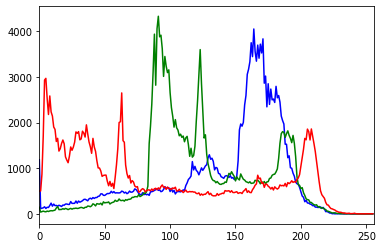

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('images/home.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

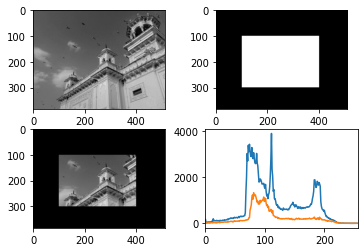

In [8]:
#Mask kullanarak histogram alma

img = cv2.imread('images/home.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

In [7]:
mask.shape

(778, 1383)

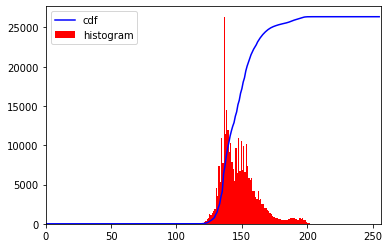

In [12]:
#Histogram eşitleme
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('images/wiki.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [14]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]

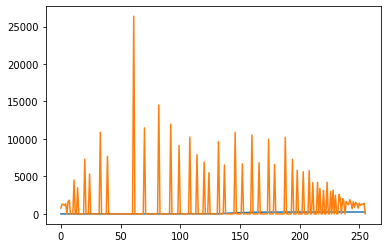

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

hist_img = cv2.calcHist([img2],[0],None,[256],[0,256])
plt.plot(cdf)
plt.plot(hist_img)


In [13]:
img = cv2.imread('images/wiki.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #resimleri yan yana ekleme
cv2.imwrite('images/res.png',res)

True

In [25]:
#Chale histogram eşitleme
#Kontrast limiti uygulanır. opencvde default 40. bunun üzerindeki değerler kırpılır histogram eşitlemeden önce diğer binlere dağıtılır
#Burada 8*8 bloklara bölünüp ondan sonra histogram eşitleme yapılır.
import numpy as np
import cv2
img = cv2.imread('images/tsukuba_l.png',0)
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
cv2.imwrite('images/clahe_2.jpg',cl1)

True